## Import packages

In [1]:
#import packages here
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import json
import glob
from datetime import datetime
import folium
%matplotlib notebook

## Loading and exploring a single data file

In [2]:
data_path = './messages'

# Opening JSON file
with open(data_path+"/0b8b6084-b29b-4235-895f-7046925ec17e.txt") as f:
    #print(type(f))
    # returns JSON object as 
    # a dictionary
    data = json.load(f)


#data

In [3]:
data.keys()

dict_keys(['Type', 'MessageId', 'TopicArn', 'Message', 'Timestamp', 'SignatureVersion', 'Signature', 'SigningCertURL', 'UnsubscribeURL', 'MessageAttributes'])

In [4]:
data_mes = json.loads(data["Message"])
data_mes

{'date': {'utc': '2023-04-21T11:00:00.000Z',
  'local': '2023-04-21T13:00:00+02:00'},
 'parameter': 'no2',
 'value': 7,
 'unit': 'µg/m³',
 'averagingPeriod': {'unit': 'hours', 'value': 1},
 'location': 'BETE714',
 'city': 'West-Vlaanderen',
 'country': 'BE',
 'coordinates': {'latitude': 51.2789633039539, 'longitude': 3.2486240629412},
 'attribution': [{'name': 'EEA',
   'url': 'http://www.eea.europa.eu/themes/air/air-quality'}],
 'sourceName': 'EEA Belgium',
 'sourceType': 'government',
 'mobile': False}

In [5]:
#Extract date of measurement
data_local_date = data_mes['date'].get('local')
print(data_local_date)

#Extract value of measurement
data_value = data_mes.get('value')
print(data_value)

#Extract parameter
data_parameter = data_mes.get('parameter')
print(data_parameter)

#Extract city
data_city = data_mes.get('city')
print(data_city)

#Extract country
data_country = data_mes.get('country')
print(data_country)

#Extract sourcetype
data_sourceType = data_mes.get('sourceType')
print(data_sourceType)

#Extract mobility
data_mobility = data_mes.get('mobile')
print(data_mobility)

#Extract location
data_loc = data_mes.get('location')
print(data_loc)

#Extract unit
data_unit = data_mes.get('unit')
print(data_unit)

2023-04-21T13:00:00+02:00
7
no2
West-Vlaanderen
BE
government
False
BETE714
µg/m³


## Reading the relevant measurement parameters from several files

In [8]:
def data_from_all_measurements(city:str)->dict:
    
    """combines individual measurements from different files into a single dictionaary and returns the dict.
    it accepts city name as an argument which has to be a string
    """
    
    new_data = {}

    new_data['local date'] = []

    new_data['value'] = []

    new_data['parameter'] = []

    new_data['city'] = []

    new_data['country'] = []

    new_data['sourceType'] = []

    new_data['mobile'] = []

    new_data['location'] = []

    new_data['unit'] = []

    for i, file in enumerate(glob.glob('./message_unique/*')):

        with open(str(file)) as f:

            data = json.load(f)

        data_mes = json.loads(data["Message"])

        if data_mes.get('city') != f'{city}':

            continue

        #print(i, file, data_mes['date'].get('local'))

        new_data['local date'].append(data_mes['date'].get('local'))

        new_data['value'].append(data_mes.get('value'))

        new_data['parameter'].append(data_mes.get('parameter'))

        new_data['city'].append(data_mes.get('city'))

        new_data['country'].append(data_mes.get('country'))

        new_data['sourceType'].append(data_mes.get('sourceType'))

        new_data['mobile'].append(data_mes.get('mobile'))

        new_data['location'].append(data_mes.get('location'))

        new_data['unit'].append(data_mes.get('unit'))
        
    return new_data
    

new_data = data_from_all_measurements("West-Vlaanderen")

pd.DataFrame.from_dict(new_data)

,local date,value,parameter,city,country,sourceType,mobile,location,unit
0,2023-04-21T03:00:00+02:00,14.5,no2,West-Vlaanderen,BE,government,False,BETE714,µg/m³
1,2023-04-21T14:00:00+02:00,7.5,no2,West-Vlaanderen,BE,government,False,BETE714,µg/m³
2,2023-04-21T05:00:00+02:00,9.5,no2,West-Vlaanderen,BE,government,False,BETE714,µg/m³
3,2023-04-21T15:00:00+02:00,7.0,no2,West-Vlaanderen,BE,government,False,BETE714,µg/m³
4,2023-04-21T06:00:00+02:00,4.0,no2,West-Vlaanderen,BE,government,False,BETE714,µg/m³
5,2023-04-21T10:00:00+02:00,14.5,no2,West-Vlaanderen,BE,government,False,BETE714,µg/m³
6,2023-04-21T17:00:00+02:00,7.5,no2,West-Vlaanderen,BE,government,False,BETE714,µg/m³
7,2023-04-21T13:00:00+02:00,7.0,no2,West-Vlaanderen,BE,government,False,BETE714,µg/m³
8,2023-04-21T16:00:00+02:00,11.5,no2,West-Vlaanderen,BE,government,False,BETE714,µg/m³
9,2023-04-21T18:00:00+02:00,17.0,no2,West-Vlaanderen,BE,government,False,BETE714,µg/m³


## Visualising Data

<IPython.core.display.Javascript object>


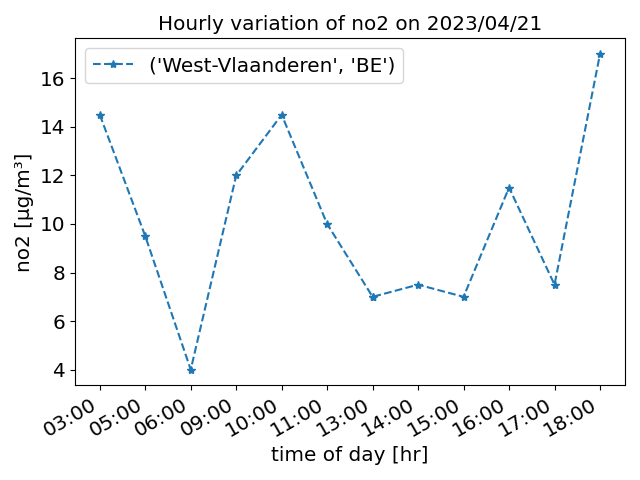

In [9]:
def visualize_data(new_data:dict):
    
    dt = np.array([datetime.fromisoformat(d).strftime("%H:%M") for d in new_data.get('local date')])

    dv = np.array(new_data.get('value'))

    #ordering/sorting unordered dataset
    index_sort = np.argsort([datetime.fromisoformat(d).strftime("%H:%M") for d in new_data.get('local date')])

    dt = dt[index_sort]

    dv = dv[index_sort]

    #print(index_sort, dt, dv)

    plt.figure()
    plt.plot(dt, dv, ls='--', marker='*', )
    plt.xlabel("time of day [hr]", fontsize='x-large')
    plt.xticks(fontsize='x-large')
    plt.yticks(fontsize='x-large')
    plt.ylabel(f"{new_data.get('parameter')[0]} [{new_data.get('unit')[0]}]", fontsize='x-large')
    plt.legend([f"{new_data.get('city')[0], new_data.get('country')[0]}"], fontsize='x-large')
    day = datetime.fromisoformat(new_data.get('local date')[0]).strftime('%Y/%m/%d')
    plt.title(f"Hourly variation of {new_data.get('parameter')[0]} on {day}", fontsize='x-large')
    plt.gcf().autofmt_xdate()
    plt.tight_layout()
    plt.savefig('data_fig.png')
    plt.show()
    
    
visualize_data(new_data)

## Create a map plot and add air quality info to each geograpical point 

In [10]:
def display_info_maps(data_mes:dict):
    
    
    lat = data_mes.get('coordinates').get('latitude')
    long = data_mes.get('coordinates').get('longitude')
    long, lat


    m = folium.Map(location=[50.5039, 4.4699], zoom_start=7)

    tooltip = str(new_data.get('city')[0])

    marker = folium.Marker(
        location=[lat, long],tooltip=tooltip,
        icon=folium.Icon(color="red", icon="info-sign"),
        popup='<img src="data_fig.png" alt="Image">',
    ).add_to(m)
    
    return m


display_info_maps(data_mes)

## Writing data to an MySQL database

In [40]:
import mysql.connector
from mysql.connector import Error

def create_server_connection(host_name, user_name, user_password):
    """makes a connection to mysql db"""
    connection = None
    try:
        connection = mysql.connector.connect(
            host=host_name,
            user=user_name,
            passwd=user_password
        )
        print("MySQL Database connection successful")
    except Error as err:
        print(f"Error: '{err}'")

    return connection

def create_database(connection, query):
    """creates the database using the query argument which contains the name of the database"""
    cursor = connection.cursor()
    try:
        cursor.execute(query)
        print("Database created successfully")
    except Error as err:
        print(f"Error: '{err}'")

def create_db_connection(host_name, user_name, user_password, db_name):
    """this function automatically connect to db of interest which we have already created"""
    connection = None
    try:
        connection = mysql.connector.connect(
            host=host_name,
            user=user_name,
            passwd=user_password,
            database=db_name
        )
        print("MySQL Database connection successful")
    except Error as err:
        print(f"Error: '{err}'")

    return connection


def execute_query(connection, query):
    """takes a querry like creating tables and populating them"""
    cursor = connection.cursor()
    try:
        cursor.execute(query)
        connection.commit()
        print("Query successful")
    except Error as err:
        print(f"Error: '{err}'")
        
def read_query(connection, query):
    """executes a querry and retrieve data from the database"""
    cursor = connection.cursor()
    result = None
    try:
        cursor.execute(query)
        result = cursor.fetchall()
        return result
    except Error as err:
        print(f"Error: '{err}'")

In [42]:
pw = " " # IMPORTANT! Put your MySQL Terminal password here.

db = "DataMinded" # This is the name of the database we will create in the next step - call it whatever you like.

connection = create_server_connection("localhost", "root", pw)

create_database_query = f"CREATE DATABASE {db}"

create_database(connection, create_database_query)

connection = create_db_connection("localhost", "root", pw, db)

create_airmax_table = """
CREATE TABLE Pollutant (
  data_id INT PRIMARY KEY,
  country VARCHAR(70) NOT NULL,
  city VARCHAR(70) NOT NULL,
  sourceType VARCHAR(40) NOT NULL,
  location VARCHAR(70) NOT NULL,
  mobile VARCHAR(40) NOT NULL,
  unit VARCHAR(30) NOT NULL,
  local_date VARCHAR(50),
  value DOUBLE,
  parameter VARCHAR(20)
  );
 """

execute_query(connection, create_airmax_table) # Execute our defined query

MySQL Database connection successful
Database created successfully
MySQL Database connection successful
Query successful


In [43]:
city = 'West-Vlaanderen'
for i, file in enumerate(glob.glob('./message_unique/*')):

    with open(str(file)) as f:

        data = json.load(f)

    data_mes = json.loads(data["Message"])

    if data_mes.get('city') != f'{city}':

        continue
    restore_russian = f"""
INSERT INTO Pollutant VALUES
({i}, '{data_mes.get('country')}', '{data_mes.get('city')}', '{data_mes.get('sourceType')}',  
'{data_mes.get('location')}', '{data_mes.get('mobile')}',  '{data_mes.get('unit')}', '{data_mes['date'].get('local')}', 
'{data_mes.get('value')}', '{data_mes.get('parameter')}');
"""
    print(restore_russian)
    execute_query(connection, restore_russian)


INSERT INTO Pollutant VALUES
(3, 'BE', 'West-Vlaanderen', 'government',  
'BETE714', 'False',  'µg/m³', '2023-04-21T03:00:00+02:00', 
'14.5', 'no2');

Query successful

INSERT INTO Pollutant VALUES
(5, 'BE', 'West-Vlaanderen', 'government',  
'BETE714', 'False',  'µg/m³', '2023-04-21T14:00:00+02:00', 
'7.5', 'no2');

Query successful

INSERT INTO Pollutant VALUES
(7, 'BE', 'West-Vlaanderen', 'government',  
'BETE714', 'False',  'µg/m³', '2023-04-21T05:00:00+02:00', 
'9.5', 'no2');

Query successful

INSERT INTO Pollutant VALUES
(10, 'BE', 'West-Vlaanderen', 'government',  
'BETE714', 'False',  'µg/m³', '2023-04-21T15:00:00+02:00', 
'7', 'no2');

Query successful

INSERT INTO Pollutant VALUES
(11, 'BE', 'West-Vlaanderen', 'government',  
'BETE714', 'False',  'µg/m³', '2023-04-21T06:00:00+02:00', 
'4', 'no2');

Query successful

INSERT INTO Pollutant VALUES
(13, 'BE', 'West-Vlaanderen', 'government',  
'BETE714', 'False',  'µg/m³', '2023-04-21T10:00:00+02:00', 
'14.5', 'no2');

Query su

## Reading data from the database

In [44]:
q5 = """
SELECT *
FROM Pollutant;
"""

results = read_query(connection, q5)
print(results)


[(3, 'BE', 'West-Vlaanderen', 'government', 'BETE714', 'False', 'µg/m³', '2023-04-21T03:00:00+02:00', 14.5, 'no2'), (5, 'BE', 'West-Vlaanderen', 'government', 'BETE714', 'False', 'µg/m³', '2023-04-21T14:00:00+02:00', 7.5, 'no2'), (7, 'BE', 'West-Vlaanderen', 'government', 'BETE714', 'False', 'µg/m³', '2023-04-21T05:00:00+02:00', 9.5, 'no2'), (10, 'BE', 'West-Vlaanderen', 'government', 'BETE714', 'False', 'µg/m³', '2023-04-21T15:00:00+02:00', 7.0, 'no2'), (11, 'BE', 'West-Vlaanderen', 'government', 'BETE714', 'False', 'µg/m³', '2023-04-21T06:00:00+02:00', 4.0, 'no2'), (13, 'BE', 'West-Vlaanderen', 'government', 'BETE714', 'False', 'µg/m³', '2023-04-21T10:00:00+02:00', 14.5, 'no2'), (15, 'BE', 'West-Vlaanderen', 'government', 'BETE714', 'False', 'µg/m³', '2023-04-21T17:00:00+02:00', 7.5, 'no2'), (16, 'BE', 'West-Vlaanderen', 'government', 'BETE714', 'False', 'µg/m³', '2023-04-21T13:00:00+02:00', 7.0, 'no2'), (19, 'BE', 'West-Vlaanderen', 'government', 'BETE714', 'False', 'µg/m³', '2023-0

In [46]:
# Returns a list of lists and then creates a pandas DataFrame
from_db = []

for result in results:
    result = list(result)
    from_db.append(result)
    
columns = ["data_id", "country", "city", "sourceType", "location", "mobile", "unit", "local date", "value", "parameter"]
df = pd.DataFrame(from_db, columns=columns)

df

,data_id,country,city,sourceType,location,mobile,unit,local date,value,parameter
0,3,BE,West-Vlaanderen,government,BETE714,False,µg/m³,2023-04-21T03:00:00+02:00,14.5,no2
1,5,BE,West-Vlaanderen,government,BETE714,False,µg/m³,2023-04-21T14:00:00+02:00,7.5,no2
2,7,BE,West-Vlaanderen,government,BETE714,False,µg/m³,2023-04-21T05:00:00+02:00,9.5,no2
3,10,BE,West-Vlaanderen,government,BETE714,False,µg/m³,2023-04-21T15:00:00+02:00,7.0,no2
4,11,BE,West-Vlaanderen,government,BETE714,False,µg/m³,2023-04-21T06:00:00+02:00,4.0,no2
5,13,BE,West-Vlaanderen,government,BETE714,False,µg/m³,2023-04-21T10:00:00+02:00,14.5,no2
6,15,BE,West-Vlaanderen,government,BETE714,False,µg/m³,2023-04-21T17:00:00+02:00,7.5,no2
7,16,BE,West-Vlaanderen,government,BETE714,False,µg/m³,2023-04-21T13:00:00+02:00,7.0,no2
8,19,BE,West-Vlaanderen,government,BETE714,False,µg/m³,2023-04-21T16:00:00+02:00,11.5,no2
9,20,BE,West-Vlaanderen,government,BETE714,False,µg/m³,2023-04-21T18:00:00+02:00,17.0,no2


In [ ]:
plt.figure()
df.plot()